# SI618 Project 1: Exploration of Phillips curve

#### Andrew Lin

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
sns.set_context("notebook")  
from pylab import rcParams
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 
import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

## Question and motivation


![Minion](http://www.economicsonline.co.uk/Global%20macro-economics%20graphs/Phillips-curve-trade-off.png)

## Datasets & Data collection methods

- OECD https://data.oecd.org
- World Bank http://data.worldbank.org/indicator/
- BLS https://data.bls.gov

## Data manipulation methods & Visualization


In [28]:
cpi_full = pd.read_csv('cpi_full.csv')
unemp_full = pd.read_csv('unemp_full.csv')

cpi_full.sample(10)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
211746,ISL,CPI,TOT_FOODENRG,IDX2010,M,1998-06,49.846300,NaN
96609,ITA,CPI,TOT,AGRWTH,M,1986-11,4.373178,NaN
132996,SWE,CPI,FOOD,AGRWTH,M,1986-01,8.553935,NaN
181802,G-7,CPI,FOOD,AGRWTH,M,2010-07,0.772540,NaN
199609,IRL,CPI,TOT_FOODENRG,IDX2010,M,1979-01,21.602070,NaN
23698,ISL,CPI,ENRG,AGRWTH,Q,2011-Q1,13.939120,NaN
96708,ITA,CPI,TOT,AGRWTH,M,1995-02,4.242929,NaN
1653,DNK,CPI,TOT,IDX2010,A,1986,56.537020,NaN
156960,CHN,CPI,TOT,IDX2010,M,1996-07,78.993020,NaN
5927,NZL,CPI,TOT,IDX2010,A,1943,2.592751,NaN


In [29]:
cpi_full = cpi_full[(cpi_full.MEASURE=='AGRWTH') & (cpi_full.FREQUENCY=='Q') & (cpi_full.SUBJECT=='TOT')].ix[:,[0,5,6]]
cpi_full.columns=['LOCATION','TIME','CPI']

unemp_full = unemp_full[(unemp_full.FREQUENCY=='Q') & (unemp_full.SUBJECT=='TOT')].ix[:,[0,5,6]]
unemp_full.columns=['LOCATION','TIME','UNEMP']

In [30]:
cpi_full=cpi_full.set_index('TIME')
unemp_full=unemp_full.set_index('TIME')

In [31]:
cpi_f_country = cpi_full[cpi_full.LOCATION == 'OECD']
unemp_f_country = unemp_full[unemp_full.LOCATION == 'OECD'].ix[:,1]
df_country = pd.concat([cpi_f_country,unemp_f_country],axis=1).dropna()
df_country['log_CPI']=np.log(df_country.CPI)
df_country['log_UNEMP']=np.log(df_country.UNEMP)
df_country=df_country[df_country.CPI!=0].dropna()
df_country.head(10)

,LOCATION,CPI,UNEMP,log_CPI,log_UNEMP
2003-Q2,OECD,2.398426,7.093606,0.874813,1.959194
2004-Q2,OECD,2.416314,6.853205,0.882243,1.924716
2005-Q1,OECD,2.494288,6.657784,0.914003,1.895787
2005-Q2,OECD,2.396072,6.609712,0.873831,1.888540
2005-Q3,OECD,2.820277,6.488519,1.036835,1.870034
2005-Q4,OECD,2.681499,6.444431,0.986376,1.863216
2006-Q1,OECD,2.734740,6.267822,1.006036,1.835429
2006-Q2,OECD,3.018106,6.087727,1.104629,1.806275
2006-Q3,OECD,2.758927,6.002122,1.014842,1.792113
2006-Q4,OECD,2.029163,5.830747,0.707623,1.763145


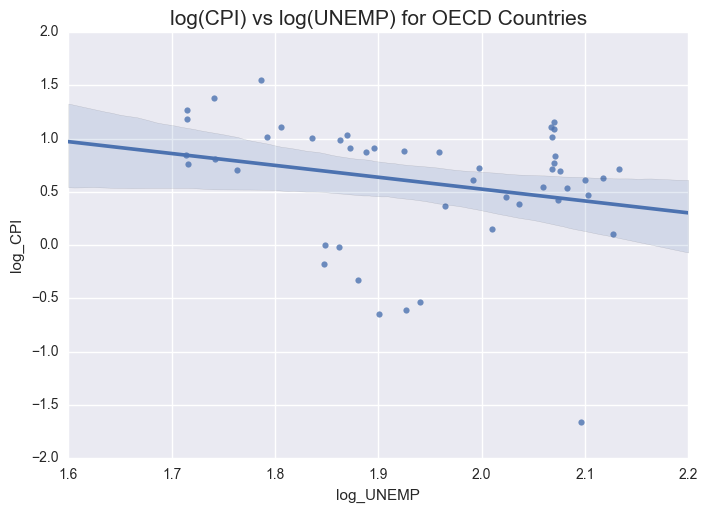

In [32]:
g = sns.regplot(x='log_UNEMP', y='log_CPI',data=df_country,fit_reg =True)
g.axes.set_title('log(CPI) vs log(UNEMP) for OECD Countries', fontsize=15)


In [33]:
def get_slope(country):
    cpi_f_country = cpi_full[cpi_full.LOCATION == country]
    unemp_f_country = unemp_full[unemp_full.LOCATION == country].ix[:,1]
    df_country = pd.concat([cpi_f_country,unemp_f_country],axis=1).dropna()
    df_country['log_CPI']=np.log(df_country.CPI)
    df_country['log_UNEMP']=np.log(df_country.UNEMP)
    df_country=df_country[(df_country.CPI!=0) & (df_country.UNEMP!=0)].dropna()

    slope, intercept, r, p, serr = stats.linregress(df_country.dropna().log_CPI,
                                                df_country.dropna().log_UNEMP)
    if np.isnan(slope):
        return 0
    return slope

In [36]:
country_list = list(unemp_full.LOCATION.unique())

country_index = pd.DataFrame({'Country':country_list, 'Index':[get_slope(i) for i in country_list]})
country_index.sort_values('Index')
country_index.head()
# country_index.to_csv('country_index.csv')

,Country,Index
0,AUS,-0.075762
1,AUT,-0.405396
2,BEL,-0.072677
3,CAN,0.031905
4,CZE,0.034268


In [35]:
%%HTML
<div class='tableauPlaceholder' id='viz1487804341508' style='position: relative'><noscript><a href='#'><img alt='Sheet 11 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;Regional_index&#47;Sheet11&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='site_root' value='' /><param name='name' value='Regional_index&#47;Sheet11' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Re&#47;Regional_index&#47;Sheet11&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1487804341508');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>